# Introduction

In this project, we will analyze and classify a wine color dataset. The dataset contains various wine parameters, such as acidity, alcohol content and pH. Our goal is to test different classification algorithms on two versions of this dataset: a less processed and a more processed version.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

classifiers = []
names = []

# Data

### Database presentation

First, we will load the data from the CSV file and take a look at it.

In [2]:
data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Data preprocessing

In this section, we will check for missing values and errors in our dataset. If so, we will repair them appropriately.

Checking for missing data:

In [3]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
null_data = data.loc[data['fixed acidity'].isna()]
print(null_data)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white            NaN             0.660         0.48             1.2   
174   white            NaN             0.270         0.31            17.7   
249   white            NaN             0.410         0.14            10.4   
267   white            NaN             0.580         0.07             6.9   
368   white            NaN             0.290         0.48             2.3   
518   white            NaN             0.130         0.28             1.9   
1079  white            NaN               NaN         0.29             6.2   
2902  white            NaN             0.360         0.14             8.9   
6428    red            NaN             0.440         0.09             2.2   
6429    red            NaN             0.705         0.10             2.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33  

### Removing errors and missing data

We will prepare two sets of data: </br>
"dataLess", in which we will remove rows that are missing, </br>
"dataMore", in which we will fill in the gaps with the median of the data.

In [5]:
dataLess = data.copy()
dataLess.dropna(inplace=True)
dataMore = data.copy()
dataMore.fillna(dataMore.median(numeric_only=True), inplace=True)

In [6]:
data.loc[16:18]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,white,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
18,white,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6


In [7]:
dataLess.loc[16:18]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,white,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
18,white,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6


In [8]:
dataMore.loc[16:18]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,white,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
17,white,7.0,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
18,white,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6


### Data processing

Now we will prepare two versions of the data: one less processed and the other more processed.

Less processed version with changed type value to 0 and 1 and data standardization:

In [9]:
dataLess = dataLess.replace({'type': {'white': 0, 'red': 1}})
X_less = dataLess.drop('type', axis=1)
y_less = dataLess['type']

scaler = StandardScaler()
X_less = scaler.fit_transform(X_less)

More processed version with changed type value to 0 and 1, standardization, PCA transformation and removal of outliers using z-score (interquartile range in this case is too restrictive and removes all rows with red wine):

Let's check if the set is balanced:

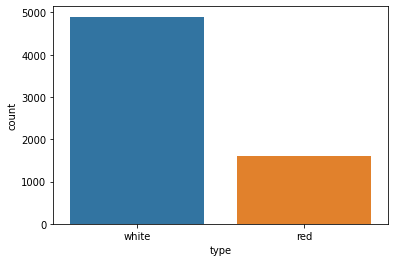

Liczba wierszy z wartością 'white':  4898
Liczba wierszy z wartością 'red':  1599


In [10]:
sns.countplot(x='type', data=dataMore)
plt.show()
numberOfRows = dataMore[dataMore['type'] == 'white'].shape[0]
print("Number of rows with value 'white': ", numberOfRows)
numberOfRows = dataMore[dataMore['type'] == 'red'].shape[0]
print("Number of rows with value 'red': ", numberOfRows)

Let's remove the outliers and check again:

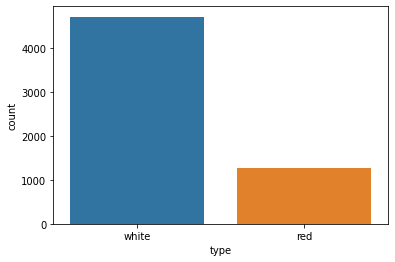

Number of rows with value 'white':  4712
Number of rows with value 'red' 1277


In [11]:
z_scores = np.abs(stats.zscore(dataMore.drop(columns=['type'])))
threshold = 3  # threshold for outliers
dataMore = dataMore[(z_scores < threshold).all(axis=1)]

sns.countplot(x='type', data=dataMore)
plt.show()
numberOfRows = dataMore[dataMore['type'] == 'white'].shape[0]
print("Number of rows with value 'white': ", numberOfRows)
numberOfRows = dataMore[dataMore['type'] == 'red'].shape[0]
print("Number of rows with value 'red'", numberOfRows)

There is a disproportion in the data, but it is mildly unbalanced, so we will not equalize the sample sizes.


Standardization and PCA:

In [12]:
dataMore = dataMore.replace({'type': {'white': 0, 'red': 1}})

X_more = dataMore.drop('type', axis=1)
y_more = dataMore['type']

scaler = StandardScaler()
X_more = scaler.fit_transform(X_more)

pca = PCA(n_components=2)
X_more = pca.fit_transform(X_more)

### Division into training and test set.

Now we will split our dataset into training and testing sets in an 80/20 ratio. About 1300/1200 rows should be enough for us to test the models well.

In [13]:
X_train_less, X_test_less, y_train_less, y_test_less = train_test_split(X_less, y_less, test_size=0.2, random_state=269402)
X_train_more, X_test_more, y_train_more, y_test_more = train_test_split(X_more, y_more, test_size=0.2, random_state=269402)

# Classification

In this section, we will test different classification algorithms on both versions of our dataset. For each classifier we will calculate accuracy and create an error matrix.

### Decision tree

A less processed version

In [14]:
# Decision tree with pruned branches
dt_less_pruned = DecisionTreeClassifier(max_depth=3, random_state=269402)
dt_less_pruned.fit(X_train_less, y_train_less)
classifiers.append(dt_less_pruned)
names.append(f"Decision tree with pruned branches (less)")


# Larger decision tree (no depth limit)
dt_less_large = DecisionTreeClassifier(random_state=269402)
dt_less_large.fit(X_train_less, y_train_less)
classifiers.append(dt_less_large)
names.append(f"Decision tree without limits (less)");

A more processed version

In [15]:
# Decision tree with pruned branches
dt_more_pruned = DecisionTreeClassifier(max_depth=3, random_state=269402)
dt_more_pruned.fit(X_train_more, y_train_more)
classifiers.append(dt_more_pruned)
names.append(f"Decision tree with pruned branches (more)")

# Larger decision tree (no depth limit)
dt_more_large = DecisionTreeClassifier(random_state=269402)
dt_more_large.fit(X_train_more, y_train_more)
classifiers.append(dt_more_large)
names.append(f"Decision tree without limits (more)");

### Naive Bayes

A less processed version

In [16]:
nb_less = GaussianNB()
nb_less.fit(X_train_less, y_train_less)
classifiers.append(nb_less)
names.append(f"Naive Bayes (less)");

A more processed version

In [17]:
nb_more = GaussianNB()
nb_more.fit(X_train_more, y_train_more)
classifiers.append(nb_more)
names.append(f"Naive Bayes (more)");

### K-Nearest Neighbors

In [18]:
k_values = [1, 3, 5, 7, 9]

A less processed version

In [19]:
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_less, y_train_less)
    classifiers.append(knn_clf)
    names.append(f'KNN k={k} (less)')

A more processed version

In [20]:
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_more, y_train_more)
    classifiers.append(knn_clf)
    names.append(f'KNN k={k} (more)')

### Neural network

In [21]:
# Various topologies and learning configurations
hidden_layer_sizes = [(50,), (100,), (150,)]
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
alphas = [0.0001, 0.001, 0.01, 0.1]

A less processed version

In [22]:
for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for solver in solvers:
            for alpha in alphas:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation,
                                    solver=solver, alpha=alpha, max_iter=500, random_state=269402)
                mlp.fit(X_train_less, y_train_less)
                classifiers.append(mlp)
                names.append(f"MLP ({hidden_layer_size}, {activation}, {solver}, {alpha}) (less)")


A more processed version

In [24]:
for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for solver in solvers:
            for alpha in alphas:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation,
                                    solver=solver, alpha=alpha, max_iter=15000, random_state=269402)
                mlp.fit(X_train_more, y_train_more)
                classifiers.append(mlp)
                names.append(f"MLP ({hidden_layer_size}, {activation}, {solver}, {alpha}) (more)")


# Summary

In this section, we will compare the results obtained for different classifiers on both versions of the data. We will determine which of the classifiers achieved the best results.

In [25]:
len(classifiers)

304

We created multiple classifiers, so let's see which ones had the highest accuracy.

In [26]:
results = {}
for clf, name in zip(classifiers, names):
    if "less" in name:
        y_pred = clf.predict(X_test_less)
        accuracy = accuracy_score(y_test_less, y_pred)
    elif "more" in name:
        y_pred = clf.predict(X_test_more)
        accuracy = accuracy_score(y_test_more, y_pred)
    results[name] = accuracy;

Let's analyze more processed data separately.

In [27]:
resultsSorted = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for key, value in resultsSorted.items():
    if "more" in key:
        print(f"{key}: {value:.4f}")

KNN k=7 (more): 0.9816
MLP ((100,), logistic, lbfgs, 0.1) (more): 0.9816
MLP ((150,), identity, adam, 0.0001) (more): 0.9816
MLP ((150,), identity, adam, 0.001) (more): 0.9816
MLP ((150,), identity, adam, 0.01) (more): 0.9816
MLP ((150,), identity, adam, 0.1) (more): 0.9816
MLP ((150,), logistic, lbfgs, 0.001) (more): 0.9816
MLP ((150,), relu, adam, 0.0001) (more): 0.9816
MLP ((150,), relu, adam, 0.001) (more): 0.9816
MLP ((150,), relu, adam, 0.01) (more): 0.9816
KNN k=9 (more): 0.9808
MLP ((50,), identity, lbfgs, 0.0001) (more): 0.9808
MLP ((50,), identity, lbfgs, 0.001) (more): 0.9808
MLP ((50,), identity, lbfgs, 0.01) (more): 0.9808
MLP ((50,), identity, lbfgs, 0.1) (more): 0.9808
MLP ((50,), identity, adam, 0.1) (more): 0.9808
MLP ((50,), logistic, lbfgs, 0.001) (more): 0.9808
MLP ((50,), logistic, adam, 0.1) (more): 0.9808
MLP ((50,), tanh, sgd, 0.0001) (more): 0.9808
MLP ((50,), tanh, sgd, 0.001) (more): 0.9808
MLP ((50,), tanh, sgd, 0.01) (more): 0.9808
MLP ((50,), tanh, sgd, 0.

The neural network coped with the problem very well. We can see that the selection of parameters did not play a major role here, all combinations obtained satisfactory results. KNN with seven and nine neighbors, also with very good results.

In [28]:
for key, value in resultsSorted.items():
    if "more" in key:
        if "tree" in key or "Bayes" in key:
            print(f"{key}: {value:.4f}")

Naive Bayes (more): 0.9783
Decision tree with pruned branches (more): 0.9766
Decision tree without limits (more): 0.9725


Naive Bayes and decision trees also performed well. Interestingly, limiting the tree slightly improved its performance.

</br>

Now let's see less processed data.

In [29]:
for key, value in resultsSorted.items():
    if "less" in key:
        print(f"{key}: {value:.4f}")

MLP ((50,), tanh, lbfgs, 0.1) (less): 0.9946
MLP ((50,), logistic, lbfgs, 0.1) (less): 0.9938
MLP ((50,), tanh, lbfgs, 0.0001) (less): 0.9938
MLP ((50,), tanh, lbfgs, 0.001) (less): 0.9938
MLP ((50,), tanh, lbfgs, 0.01) (less): 0.9938
MLP ((100,), logistic, lbfgs, 0.1) (less): 0.9938
MLP ((100,), tanh, lbfgs, 0.1) (less): 0.9938
MLP ((150,), logistic, lbfgs, 0.1) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.0001) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.001) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.01) (less): 0.9938
MLP ((150,), tanh, lbfgs, 0.1) (less): 0.9938
MLP ((150,), tanh, adam, 0.0001) (less): 0.9938
MLP ((150,), tanh, adam, 0.001) (less): 0.9938
MLP ((150,), tanh, adam, 0.01) (less): 0.9938
MLP ((50,), tanh, adam, 0.0001) (less): 0.9930
MLP ((50,), tanh, adam, 0.001) (less): 0.9930
MLP ((50,), tanh, adam, 0.01) (less): 0.9930
MLP ((50,), relu, lbfgs, 0.0001) (less): 0.9930
MLP ((50,), relu, lbfgs, 0.01) (less): 0.9930
MLP ((50,), relu, lbfgs, 0.1) (less): 0.9930
MLP ((50,),

Here the situation is completely different. The results are better without z-score and PCA. Data standardization alone was sufficient in this case. Additionally, the best results were achieved by neural networks, although KNN, Trees and Bayes have an accuracy of over 95%.

In [30]:
for key, value in resultsSorted.items():
    if "less" in key:
        if "KNN" in key:
            print(f"{key}: {value:.4f}")

KNN k=1 (less): 0.9923
KNN k=3 (less): 0.9907
KNN k=5 (less): 0.9907
KNN k=7 (less): 0.9907
KNN k=9 (less): 0.9884


### Error matrices and charts

Let's visualize some models.

In [31]:
keysToShow = ["MLP ((50,), tanh, lbfgs, 0.1) (less)", "MLP ((50,), logistic, lbfgs, 0.1) (less)", "KNN k=1 (less)",
              "KNN k=3 (less)", "Decision tree without limits (less)", "Naive Bayes (less)"]
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
someOfBestResults = dictfilt(results, keysToShow)

Decision tree without limits (less) - Accuracy: 0.9814


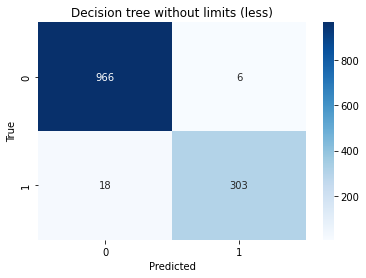

Naive Bayes (less) - Accuracy: 0.9760


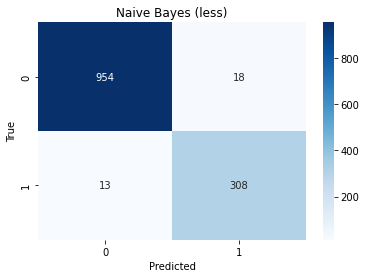

KNN k=1 (less) - Accuracy: 0.9923


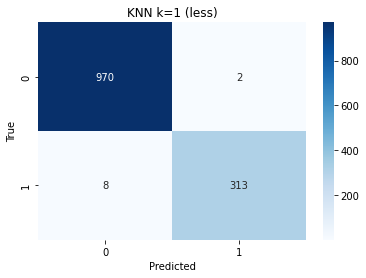

KNN k=3 (less) - Accuracy: 0.9907


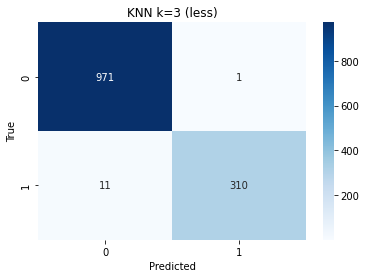

MLP ((50,), logistic, lbfgs, 0.1) (less) - Accuracy: 0.9938


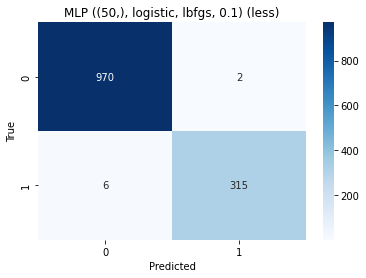

MLP ((50,), tanh, lbfgs, 0.1) (less) - Accuracy: 0.9946


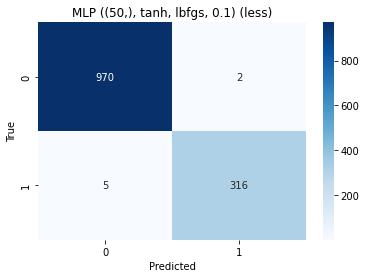

In [32]:
def plot_confusion_matrix_custom(cm, title='Confusion matrix'):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

for clf, name in zip(classifiers, names):
    for resultName in someOfBestResults.keys():
        if resultName == name:
            y_pred = clf.predict(X_test_less)
            accuracy = accuracy_score(y_test_less, y_pred)
            print(f"{name} - Accuracy: {accuracy:.4f}")
            
            # Visualization of the error matrix
            matrix = confusion_matrix(y_test_less, y_pred)
            plot_confusion_matrix_custom(matrix, title=name)

The limited memory of the hardware on which the calculations are performed did not allow us to maintain the learning curves. </br>
Source: https://github.com/amueller/introduction_to_ml_with_python/issues/67 </br>
There will be a learning curve in this work later.

# Different classification

Let's also see how the models will deal with the classification of the wine quality column.

In [33]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
dataMore = data.copy()
dataMore.fillna(dataMore.median(numeric_only=True), inplace=True)
dataMore = dataMore.replace({'type': {'white': 0, 'red': 1}})

X_more = dataMore.drop('quality', axis=1)
y_more = dataMore['quality']

scaler = StandardScaler()
X_more = scaler.fit_transform(X_more)

X_train_more, X_test_more, y_train_more, y_test_more = train_test_split(X_more, y_more, test_size=0.2, random_state=269402)

classifiersQuality = []
namesQuality = []

### Decision tree

In [35]:
dt_more_large = DecisionTreeClassifier(random_state=269402)
dt_more_large.fit(X_train_more, y_train_more)
classifiersQuality.append(dt_more_large)
namesQuality.append(f"Decision tree without limits (more)");

### Naive Bayes

In [36]:
nb_more = GaussianNB()
nb_more.fit(X_train_more, y_train_more)
classifiersQuality.append(nb_more)
namesQuality.append(f"Naive Bayes (more)");

### K-Nearest Neighbors

In [37]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_more, y_train_more)
    classifiersQuality.append(knn_clf)
    namesQuality.append(f'KNN k={k} (more)')

### Neural network

In [38]:
hidden_layer_sizes = [(100,), (150,)]
activations = ['tanh', 'relu']
solvers = ['sgd', 'adam']
alphas = [0.0001, 0.001, 0.01, 0.1]

for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for solver in solvers:
            for alpha in alphas:
                mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation,
                                    solver=solver, alpha=alpha, max_iter=15000, random_state=269402)
                mlp.fit(X_train_more, y_train_more)
                classifiersQuality.append(mlp)
                namesQuality.append(f"MLP ({hidden_layer_size}, {activation}, {solver}, {alpha}) (more)")

# Results

In [39]:
resultsQuality = {}
for clf, name in zip(classifiersQuality, namesQuality):
    y_pred = clf.predict(X_test_more)
    accuracy = accuracy_score(y_test_more, y_pred)
    resultsQuality[name] = accuracy;

In [40]:
resultsSortedQuality = dict(sorted(resultsQuality.items(), key=lambda item: item[1], reverse=True))
for key, value in resultsSortedQuality.items():
    print(f"{key}: {value:.4f}")

KNN k=1 (more): 0.6385
Decision tree without limits (more): 0.6108
MLP ((150,), relu, adam, 0.0001) (more): 0.5869
MLP ((100,), relu, sgd, 0.1) (more): 0.5846
MLP ((150,), tanh, adam, 0.01) (more): 0.5815
MLP ((150,), relu, sgd, 0.01) (more): 0.5800
MLP ((100,), relu, sgd, 0.001) (more): 0.5792
MLP ((100,), relu, sgd, 0.01) (more): 0.5777
MLP ((150,), tanh, adam, 0.0001) (more): 0.5777
MLP ((100,), relu, sgd, 0.0001) (more): 0.5769
MLP ((100,), relu, adam, 0.01) (more): 0.5762
MLP ((150,), relu, sgd, 0.1) (more): 0.5762
MLP ((150,), relu, adam, 0.01) (more): 0.5762
MLP ((150,), tanh, sgd, 0.01) (more): 0.5754
MLP ((150,), tanh, adam, 0.001) (more): 0.5746
MLP ((150,), relu, adam, 0.001) (more): 0.5738
MLP ((150,), relu, sgd, 0.001) (more): 0.5700
MLP ((150,), tanh, sgd, 0.0001) (more): 0.5677
MLP ((150,), tanh, sgd, 0.001) (more): 0.5669
MLP ((150,), tanh, sgd, 0.1) (more): 0.5669
MLP ((150,), relu, adam, 0.1) (more): 0.5654
MLP ((100,), tanh, sgd, 0.01) (more): 0.5638
MLP ((100,), tan

When classifying wine quality, our models performed significantly worse than before. The k=1 KNN method is the best, but it could not be fully trusted with an accuracy of 64%.

Decision tree without limits (more) - Accuracy: 0.6108


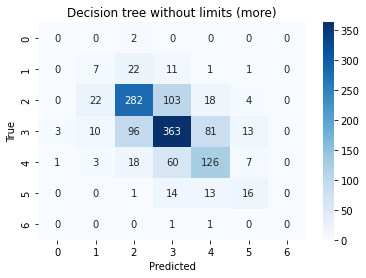

Naive Bayes (more) - Accuracy: 0.4069


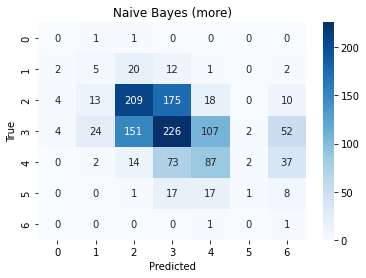

KNN k=1 (more) - Accuracy: 0.6385


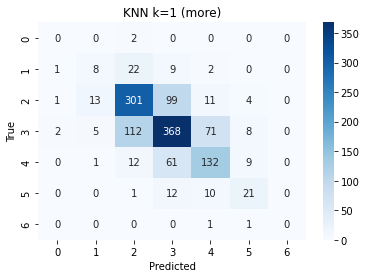

KNN k=9 (more) - Accuracy: 0.5546


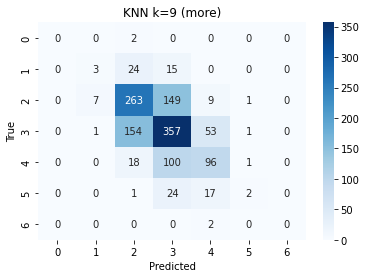

MLP ((100,), relu, sgd, 0.01) (more) - Accuracy: 0.5777


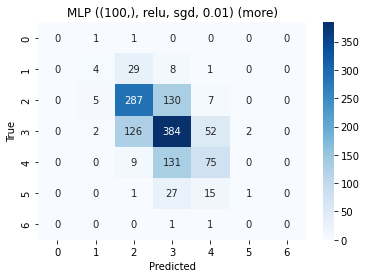

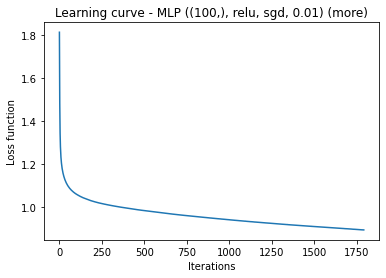

MLP ((100,), relu, sgd, 0.1) (more) - Accuracy: 0.5846


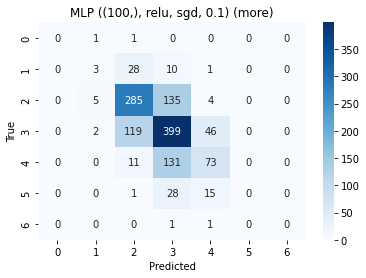

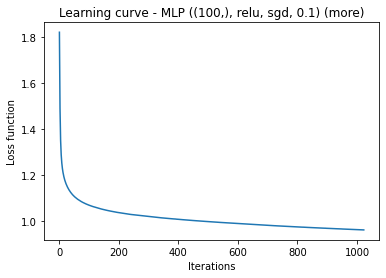

In [41]:
keysToShow = ["KNN k=1 (more)", "KNN k=9 (more)", "MLP ((100,), relu, sgd, 0.01) (more)",
              "MLP ((100,), relu, sgd, 0.1) (more)", "Naive Bayes (more)", "Decision tree without limits (more)"]
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
someOfBestResultsQuality = dictfilt(results, keysToShow)

for clf, name in zip(classifiersQuality, namesQuality):
    for resultName in someOfBestResultsQuality.keys():
        if resultName == name:
            y_pred = clf.predict(X_test_more)
            accuracy = accuracy_score(y_test_more, y_pred)
            print(f"{name} - Accuracy: {accuracy:.4f}")
            
            # Wizualizacja macierzy błędów
            matrix = confusion_matrix(y_test_more, y_pred)
            plot_confusion_matrix_custom(matrix, title=name)
            
            # Krzywa uczenia się dla sieci neuronowych
            if isinstance(clf, MLPClassifier):
                plt.plot(clf.loss_curve_)
                plt.title(f"Learning curve - {name}")
                plt.xlabel("Iterations")
                plt.ylabel("Loss function")
                plt.show()

#### Thank you for taking the time to read this work. </br>
#### Report prepared by Kamil Schlagowski

# Bibliography

Materials used when writing the project:

- lectures on computational intelligence


- https://www.kaggle.com/datasets/rajyellow46/wine-quality

- https://github.com/amueller/introduction_to_ml_with_python/issues/67

- https://datascience.stackexchange.com/questions/20199/train-test-split-error-found-input-variables-with-inconsistent-numbers-of-sam

- https://jakbadacdane.pl/jak-wyhodowac-drzewo-decyzyjne/

- https://scikit-learn.org/stable/modules/preprocessing.html

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

- https://realpython.com/sort-python-dictionary/
- https://realpython.com/python-sort/

- https://stackoverflow.com/questions/70897794/finding-the-mean-of-nuisance-columns-in-dataframe-error
- https://stackoverflow.com/questions/49871101/how-to-select-range-of-rows-in-pandas#49871201
- https://stackoverflow.com/questions/37154329/jupyter-notebook-command-for-hide-the-output-of-a-cell
- https://stackoverflow.com/questions/2590503/how-to-find-whether-a-string-is-contained-in-another-string#2590519
- https://stackoverflow.com/questions/2590503/how-to-find-whether-a-string-is-contained-in-another-string#2590519
- https://stackoverflow.com/questions/3420122/filter-dict-to-contain-only-certain-keys

- Github Copilot also helped me:
</br> https://github.com/features/copilot
- and Chat GPT 4.0:
</br> https://chat.openai.com/?model=gpt-4